In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

# Descriptive Statistics

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

In [7]:
for column in numerical_columns:
    mean_val = data[column].mean()
    median_val = data[column].median()
    mode_val = data[column].mode().values[0]
    
    print(f"Column: {column}")
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Mode: {mode_val}\n")

Column: age
Mean: 43.23
Median: 45.00
Mode: 78.0

Column: avg_glucose_level
Mean: 106.15
Median: 91.88
Mode: 93.88

Column: bmi
Mean: 28.89
Median: 28.10
Mode: 28.7



In [8]:
data["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [9]:
#Count of categorical variables
print("\nCount of Categorical Variables:")
print("\n",data['gender'].value_counts())
print("\n",data['ever_married'].value_counts())
print("\n",data['work_type'].value_counts())
print("\n",data['Residence_type'].value_counts())
print("\n",data['smoking_status'].value_counts())
print("\n",data['hypertension'].value_counts())
print("\n",data['heart_disease'].value_counts())
print("\n",data['stroke'].value_counts())


Count of Categorical Variables:

 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

 Yes    3353
No     1757
Name: ever_married, dtype: int64

 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

 0    4612
1     498
Name: hypertension, dtype: int64

 0    4834
1     276
Name: heart_disease, dtype: int64

 0    4861
1     249
Name: stroke, dtype: int64


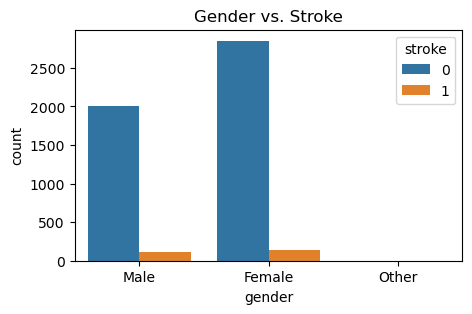

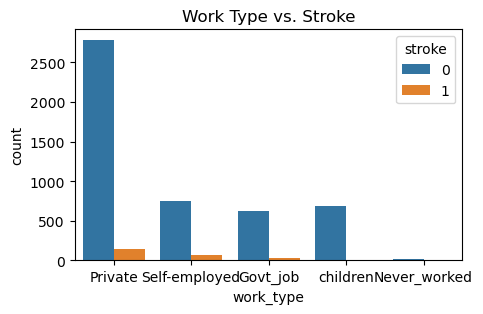

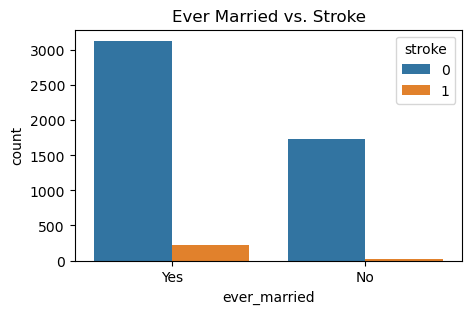

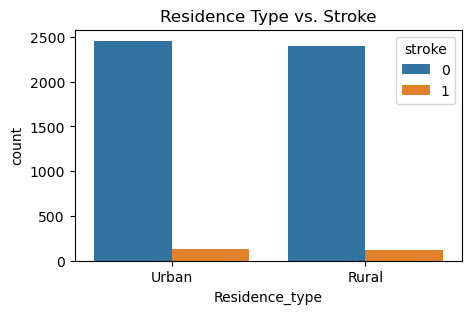

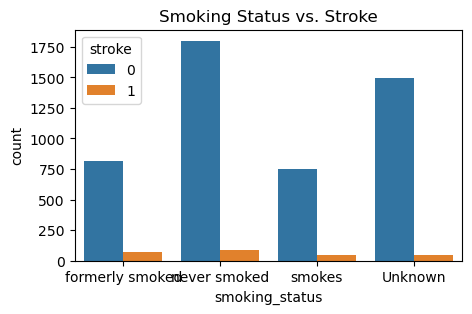

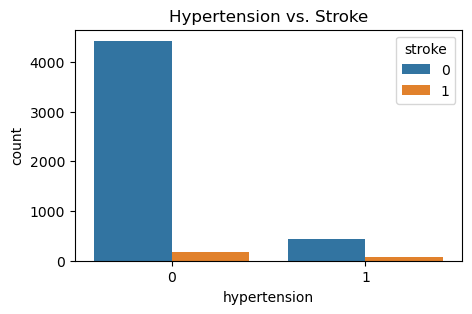

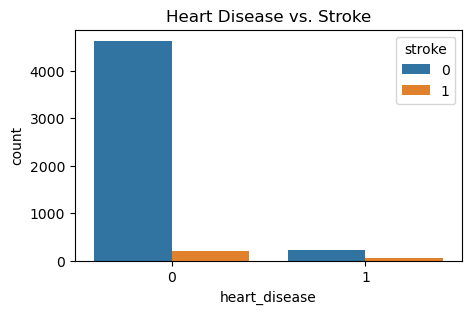

In [10]:
# Countplot for categorical variables
plt.figure(figsize=(5, 3))
sns.countplot(x='gender', hue='stroke', data=data)
plt.title('Gender vs. Stroke')
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(x='work_type', hue='stroke', data=data)
plt.title('Work Type vs. Stroke')
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(x='ever_married', hue='stroke', data=data)
plt.title('Ever Married vs. Stroke')
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(x='Residence_type', hue='stroke', data=data)
plt.title('Residence Type vs. Stroke')
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(x='smoking_status', hue='stroke', data=data)
plt.title('Smoking Status vs. Stroke')
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(x='hypertension', hue='stroke', data=data)
plt.title('Hypertension vs. Stroke')
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(x='heart_disease', hue='stroke', data=data)
plt.title('Heart Disease vs. Stroke')
plt.show()

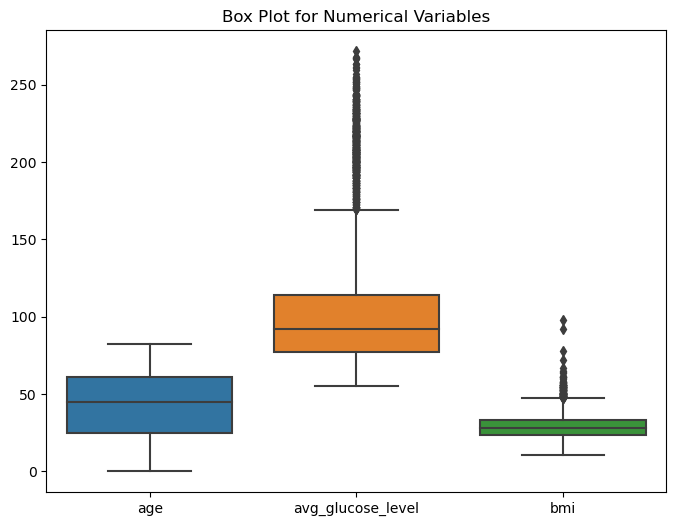

In [11]:
# Boxplot for numerical variables
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plot for Numerical Variables')
plt.show()

> #  **Range**

In [12]:
print('max Age :',data['age'].max())
print('Min Age :',data['age'].min())
print('Range :',data['age'].max()-data['age'].min())

max Age : 82.0
Min Age : 0.08
Range : 81.92


## Inference
-------
The age distribution in the dataset shows a wide range, ranging from a minimum age of 0.08 years (approximately 1 month) to a maximum age of 82.0 years. The age range spans over 81.92 years, indicating significant variability in the ages of individuals represented in the dataset.

This diverse age range is important for understanding the potential impact of age on stroke prediction. The dataset includes individuals ranging from infants to elderly adults, encompassing various life stages and age-related health conditions. Analyzing stroke occurrences across such a broad age spectrum can provide valuable insights into the relationship between age and stroke risk.

> #  **Interquartile Range (IQR)**

In [13]:
 data['bmi'].quantile(0.75)-data['bmi'].quantile(0.25)

9.600000000000001

## Inference
-------
The interquartile range (IQR) for the 'bmi' (Body Mass Index) variable in the dataset is approximately 9.60 units. The IQR is a measure of statistical dispersion and represents the range of values that encompass the middle 50% of the data.

A larger IQR indicates greater variability or spread in the data. In this context, a 9.60-unit IQR for BMI suggests significant variation in BMI values among the individuals represented in the dataset.

The IQR is useful for understanding the central distribution of BMI values and helps identify potential outliers or extreme values that lie outside the middle 50% range. By focusing on the middle 50% of the data, the IQR provides a more robust representation of the typical BMI values observed in the dataset, minimizing the influence of extreme values.

> #  **Variance**

In [14]:
# Calculate the variance of 'avg_glucose_level'
avg_glucose_level_variance = data['avg_glucose_level'].var()

print(f"Variance of avg_glucose_level: {avg_glucose_level_variance:.2f}")

Variance of avg_glucose_level: 2050.60


## Inference
-------
The variance of the 'avg_glucose_level' variable in the dataset is calculated to be approximately 2050.60. Variance is a statistical measure that quantifies the spread or dispersion of values in a dataset around the mean.

In the context of 'avg_glucose_level', a variance of 2050.60 suggests significant variability in the glucose level values among the individuals represented in the dataset. This variability may be indicative of diverse glucose level patterns across the population and can be relevant for understanding the distribution of glucose levels and potential implications for health and disease risk.

In [15]:
# Calculate the variance of 'bmi'
bmi_variance = data['bmi'].var()

print(f"Variance of bmi: {bmi_variance:.2f}")

Variance of bmi: 61.69


## Inference 
------
The variance of the 'bmi' (Body Mass Index) variable in the dataset is calculated to be approximately 61.69. Variance is a statistical measure that quantifies the spread or dispersion of values in a dataset around the mean.

For the 'bmi' variable, a variance of 61.69 indicates that there is notable variability in BMI values among the individuals represented in the dataset. This variability suggests that there are diverse body mass index values, reflecting different body compositions and weights within the population under study.

> #  **Standard Deviation**

In [16]:
# Calculate the standard deviation of 'avg_glucose_level'
avg_glucose_level_standard_deviation = data['avg_glucose_level'].std()

print(f"standard deviation of avg_glucose_level: {avg_glucose_level_standard_deviation:.2f}")

standard deviation of avg_glucose_level: 45.28


## Inference
-------
The standard deviation of the 'avg_glucose_level' variable in the dataset is calculated to be approximately 45.28. The standard deviation is a statistical measure that quantifies the dispersion or variability of values in a dataset around the mean.

For the 'avg_glucose_level' variable, a standard deviation of 45.28 indicates that the glucose level values among the individuals in the dataset exhibit considerable variability around the mean glucose level. This variability suggests that there is a notable spread of glucose levels across the population under study.

A higher standard deviation in 'avg_glucose_level' implies that the glucose level values are more widely scattered from the mean, indicating a broader range of glucose levels among the individuals. This variability is important for understanding the distribution of glucose levels and may have clinical implications, particularly in the context of health conditions related to glucose regulation, such as diabetes or metabolic disorders.

In [17]:
# Calculate the standard deviation of 'bmi'
bmi_standard_deviation = data['bmi'].std()

print(f"standard deviation of bmi: {bmi_standard_deviation:.2f}")

standard deviation of bmi: 7.85


> #  **Coefficient of Variance**

In [18]:
print('coefficient of variation of avg_glucose_level:',data['avg_glucose_level'].std()/data['avg_glucose_level'].mean())
print('% of variation:',data['avg_glucose_level'].std()/data['avg_glucose_level'].mean() * 100)

coefficient of variation of avg_glucose_level: 0.426609054349205
% of variation: 42.6609054349205


## Inference
-----
The coefficient of variation and percentage of variation for the 'avg_glucose_level' variable in the dataset are calculated to be approximately 0.43 and 42.66%, respectively.

The coefficient of variation (CV) is a statistical measure that represents the relative variability of a dataset in relation to its mean. It is calculated by dividing the standard deviation by the mean. In this case, the coefficient of variation for 'avg_glucose_level' is approximately 0.43, indicating that the standard deviation is 43% of the mean glucose level. A higher CV value suggests a relatively higher dispersion or spread of values around the mean, indicating greater variability in glucose level measurements.

These measures are useful in assessing the consistency and stability of glucose level measurements within the dataset. A higher coefficient of variation and percentage of variation can imply that the glucose levels among individuals have significant variability around the mean, indicating diverse glucose level patterns.

In [19]:
print('coefficient of variation of bmi:',data['bmi'].std()/data['bmi'].mean())
print('% of variation:',data['bmi'].std()/data['bmi'].mean() * 100)

coefficient of variation of bmi: 0.2718306278267497
% of variation: 27.183062782674973


> #  **Describe**

In [20]:
data.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


> #  **Skewness**

In [21]:
data.skew()

/tmp/ipykernel_32/1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

## Inference
-----
The values provided represent the skewness of different variables in the dataset. Skewness is a measure of the asymmetry of the probability distribution of a variable. A positive skewness value indicates that the distribution is skewed to the right (tail is longer on the right side), while a negative skewness value indicates a left-skewed distribution (tail is longer on the left side). A skewness value close to zero indicates a relatively symmetric distribution.

Here are the inferences for each variable based on their skewness values:

id: The 'id' variable has a skewness value of approximately -0.02, indicating a slightly left-skewed distribution. This might suggest that the dataset has slightly more lower 'id' values compared to higher ones.

age: The 'age' variable has a skewness value of approximately -0.14, suggesting a very slight left-skewed distribution. This implies that the dataset might have a slightly higher concentration of younger individuals.

hypertension: The 'hypertension' variable has a skewness value of approximately 2.72, indicating a highly right-skewed distribution. This suggests that there might be a higher proportion of individuals without hypertension compared to those with hypertension in the dataset.

heart_disease: The 'heart_disease' variable has a skewness value of approximately 3.95, indicating a highly right-skewed distribution. This suggests that there might be a higher proportion of individuals without heart disease compared to those with heart disease in the dataset.

avg_glucose_level: The 'avg_glucose_level' variable has a skewness value of approximately 1.57, indicating a moderately right-skewed distribution. This suggests that the dataset might have a concentration of lower average glucose levels with a tail extending towards higher glucose levels.

bmi: The 'bmi' (Body Mass Index) variable has a skewness value of approximately 1.06, indicating a moderately right-skewed distribution. This suggests that the dataset might have a concentration of lower BMI values with a tail extending towards higher BMI values.

stroke: The 'stroke' variable (target variable) has a skewness value of approximately 4.19, indicating a highly right-skewed distribution. This suggests that there might be a higher proportion of individuals without stroke compared to those with stroke in the dataset.

In [22]:
skewness = data[numerical_columns].skew(numeric_only=True)
print("\nSkewness:")
print(skewness)


Skewness:
age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64


> #  **Kurtosis**

In [23]:
data.kurt()

/tmp/ipykernel_32/2907027414.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


id                   -1.212368
age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
avg_glucose_level     1.680479
bmi                   3.362659
stroke               15.589736
dtype: float64

## Inference
-----
The values provided represent the kurtosis of different variables in the dataset. Kurtosis is a measure of the peakedness or flatness of the probability distribution of a variable compared to a normal distribution. A positive kurtosis value indicates a relatively more peaked distribution with heavier tails, while a negative kurtosis value indicates a flatter distribution with lighter tails. A kurtosis value close to zero indicates a distribution similar to a normal distribution.

Here are the inferences for each variable based on their kurtosis values:

id: The 'id' variable has a kurtosis value of approximately -1.21, indicating a slightly flatter distribution compared to a normal distribution. This implies that the distribution of 'id' values has lighter tails and is less peaked.

age: The 'age' variable has a kurtosis value of approximately -0.99, indicating a distribution that is slightly flatter than a normal distribution. This suggests that the distribution of ages in the dataset has lighter tails and is less peaked.

hypertension: The 'hypertension' variable has a kurtosis value of approximately 5.38, indicating a distribution that is more peaked with heavier tails compared to a normal distribution. This suggests that the distribution of hypertension status has more extreme values.

heart_disease: The 'heart_disease' variable has a kurtosis value of approximately 13.59, indicating a highly peaked distribution with very heavy tails. This suggests that the distribution of heart disease status has a significant number of extreme values.

avg_glucose_level: The 'avg_glucose_level' variable has a kurtosis value of approximately 1.68, indicating a distribution that is slightly more peaked with heavier tails compared to a normal distribution. This suggests that the distribution of average glucose levels has some extreme values.

bmi: The 'bmi' (Body Mass Index) variable has a kurtosis value of approximately 3.36, indicating a distribution that is more peaked with heavier tails compared to a normal distribution. This suggests that the distribution of BMI values has more extreme values.

stroke: The 'stroke' variable (target variable) has a kurtosis value of approximately 15.59, indicating a highly peaked distribution with very heavy tails. This suggests that the distribution of stroke occurrence has a significant number of extreme values.

In [24]:
Kurtosis = data[numerical_columns].kurt(numeric_only=True)
print(Kurtosis)

age                 -0.991010
avg_glucose_level    1.680479
bmi                  3.362659
dtype: float64


> #  **Correlation**

In [25]:
correlation_matrix = data[numerical_columns + ['stroke']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                        age  avg_glucose_level       bmi    stroke
age                1.000000           0.238171  0.333398  0.245257
avg_glucose_level  0.238171           1.000000  0.175502  0.131945
bmi                0.333398           0.175502  1.000000  0.042374
stroke             0.245257           0.131945  0.042374  1.000000


## Inference
-----
The correlation matrix shown above provides valuable insights into the relationships between different numerical variables in the dataset. Correlation measures the strength and direction of linear relationships between pairs of variables. The values in the matrix range from -1 to 1, where:

A positive value indicates a positive correlation, meaning that when one variable increases, the other tends to increase as well.
A negative value indicates a negative correlation, meaning that when one variable increases, the other tends to decrease.
A value close to 0 indicates a weak or no linear correlation between the variables.
Here are the inferences based on the correlation matrix:

Age vs. Avg_glucose_level: The correlation coefficient between 'age' and 'avg_glucose_level' is approximately 0.24, indicating a weak positive correlation. This suggests that there is a slight tendency for glucose levels to increase slightly with age. However, the correlation is not strong, indicating that age is not a major predictor of average glucose level in the dataset.

Age vs. BMI: The correlation coefficient between 'age' and 'bmi' is approximately 0.33, indicating a weak positive correlation. This suggests that there is a slight tendency for BMI to increase slightly with age. However, as with 'avg_glucose_level', the correlation is not strong, indicating that age is not a major predictor of BMI in the dataset.

Age vs. Stroke: The correlation coefficient between 'age' and 'stroke' is approximately 0.25, indicating a weak positive correlation. This suggests that there is a slight tendency for stroke occurrence to increase slightly with age. Again, the correlation is not strong, indicating that age is not the sole determinant of stroke risk in the dataset.

Avg_glucose_level vs. BMI: The correlation coefficient between 'avg_glucose_level' and 'bmi' is approximately 0.18, indicating a weak positive correlation. This suggests that there is a slight tendency for average glucose levels to increase slightly with BMI. However, the correlation is not strong, indicating that BMI is not a major predictor of average glucose level in the dataset.

Avg_glucose_level vs. Stroke: The correlation coefficient between 'avg_glucose_level' and 'stroke' is approximately 0.13, indicating a weak positive correlation. This suggests that there is a slight tendency for stroke occurrence to increase slightly with higher average glucose levels. However, the correlation is not strong, indicating that average glucose level is not the sole determinant of stroke risk in the dataset.

BMI vs. Stroke: The correlation coefficient between 'bmi' and 'stroke' is approximately 0.04, indicating a very weak positive correlation. This suggests that there is a very slight tendency for stroke occurrence to increase slightly with higher BMI. However, the correlation is extremely weak, indicating that BMI is not a strong predictor of stroke risk in the dataset.

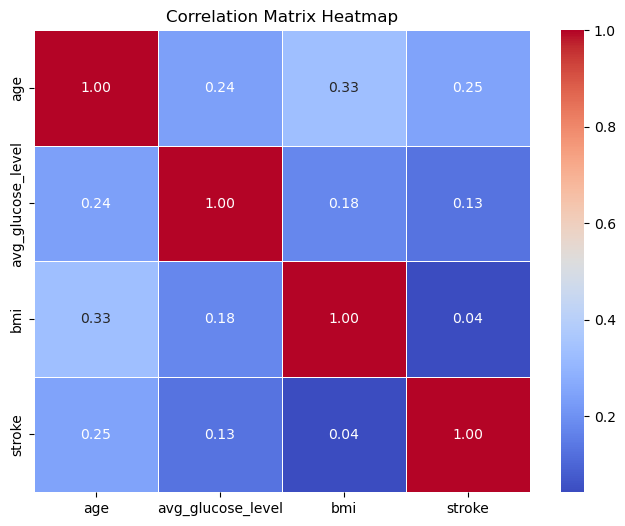

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
data.corr()

/tmp/ipykernel_32/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


/tmp/ipykernel_32/2246898758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


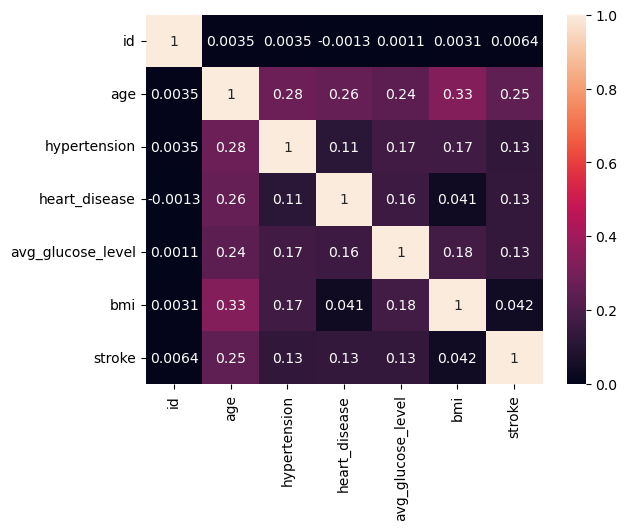

In [28]:
sns.heatmap(data.corr(),annot=True)
plt.show()

> #  **Covariance**

In [29]:
data.cov()

/tmp/ipykernel_32/4020818503.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,4.478185e+08,1693.043854,22.279895,-6.199628,1046.779923,508.542096,29.107945
age,1.693044e+03,511.331792,1.853816,1.348494,243.882731,59.061247,1.194146
hypertension,2.227989e+01,1.853816,0.087976,0.007262,2.343429,0.380736,0.008169
heart_disease,-6.199628e+00,1.348494,0.007262,0.051104,1.656923,0.070465,0.006567
avg_glucose_level,1.046780e+03,243.882731,2.343429,1.656923,2050.600820,61.234769,1.286527
bmi,5.085421e+02,59.061247,0.380736,0.070465,61.234769,61.686364,0.067199
stroke,2.910794e+01,1.194146,0.008169,0.006567,1.286527,0.067199,0.046363


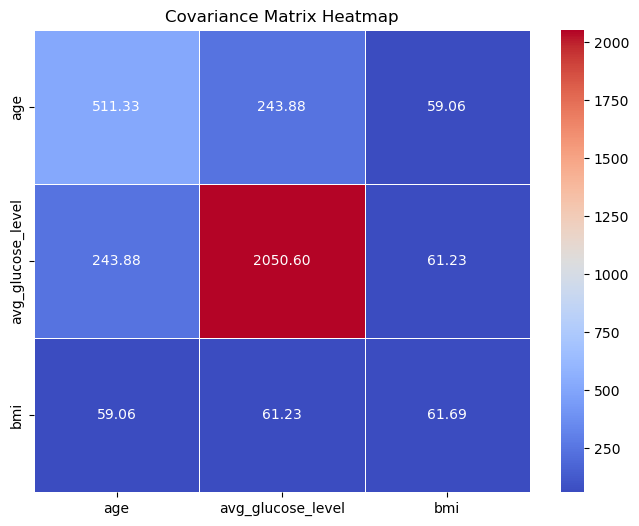

In [30]:
cov_matrix = data[numerical_columns].cov()

# Step 3: Create the covariance matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

/tmp/ipykernel_32/2427350009.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.cov(),annot=True)


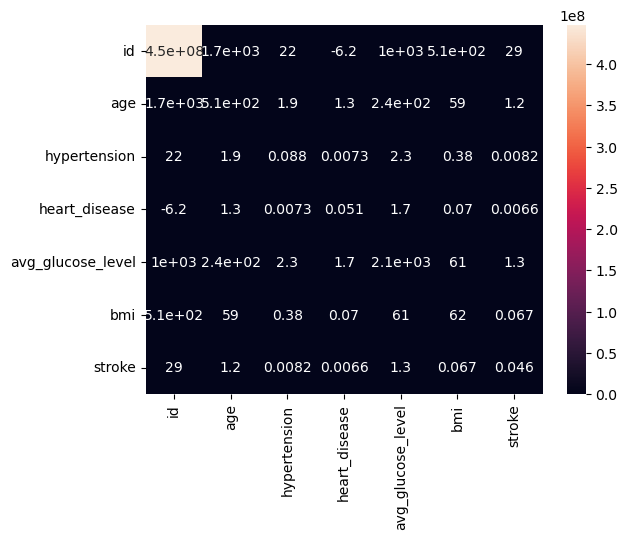

In [31]:
sns.heatmap(data.cov(),annot=True)
plt.show()